In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def data_transformation(data_1, data_2, data_3):
    data = [data_1, data_2, data_3]
    for i, df in enumerate(data):
        df = df[df.iloc[:, 1] == "Polska"]
        df = df.reset_index()
        data[i] = df
    keys = data[0].keys().tolist()
    columns = ['Rok', 'Grupa wiekowa - 19-24 lata','Grupa wiekowa - 25-29 lat','Grupa wiekowa - 30-34 lata']
    data[0] = data[0][columns]
    keys = data[1].keys().tolist()
    columns = ['Rok', "Grupa wiekowa - '19-24'","Grupa wiekowa - '25-29'","Grupa wiekowa - '30-34'"]
    data[1] = data[1][columns]
    data[2] = data[2][columns]
    to_key = ['Rok', "19-24","25-29","30-34"]
    for i, df in enumerate(data):
        keys = data[i].keys().tolist()
        column_dict = {keys[i]:to_key[i] for i in range(4)}
        data[i] = data[i].rename(columns=column_dict)
    data = pd.concat(data)
    data = data.reset_index()
    data = data[to_key]
    data["19-34"] = data.sum(axis=1)
    data = data.loc[1:21,]
    return data

In [3]:
data_1 = pd.read_excel("zamachy-1999-2012.xls")
data_2 = pd.read_excel("zamachy-2013-2016.xlsx")
data_3 = pd.read_excel("zamachy-2017-2020.xlsx")

attempts_data = data_transformation(data_1, data_2, data_3)

data_1 = pd.read_excel("samobojstwa-1999-2012.xls")
data_2 = pd.read_excel("samobojstwa-2013-2016.xlsx")
data_3 = pd.read_excel("samobojstwa-2017-2020.xlsx")

suicide_data = data_transformation(data_1, data_2, data_3)
suicide_data.loc[1:21,].head()

,Rok,19-24,25-29,30-34,19-34
1,2000,459.0,309.0,338.0,3106.0
2,2001,431.0,342.0,332.0,3106.0
3,2002,469.0,357.0,330.0,3158.0
4,2003,422.0,340.0,321.0,3086.0
5,2004,487.0,353.0,324.0,3168.0


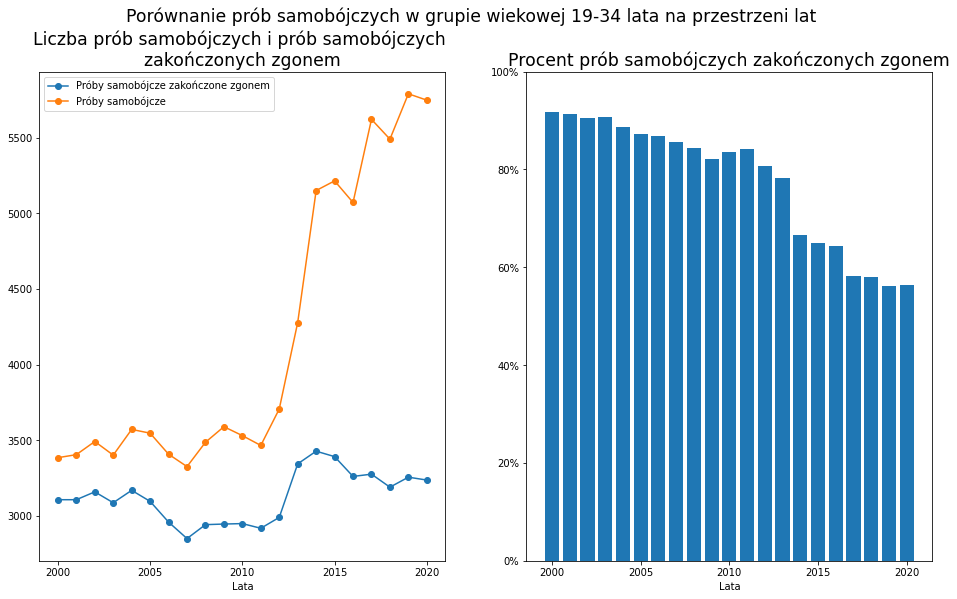

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
N = len(suicide_data.index)
x = np.arange(N)
ax1.plot(x, suicide_data["19-34"], 'o-', label='Próby samobójcze zakończone zgonem')
ax1.plot(x, attempts_data["19-34"], 'o-', label='Próby samobójcze')
ax2.bar(x, suicide_data["19-34"]/attempts_data["19-34"])


xlabels = [i+2000 for i in range(0, N, 5)]
ax1.set_xticks(np.arange(0, N, 5), xlabels)
ax1.set_xlabel("Lata")
ax1.set_yticks(np.arange(3000, 5501, 500))
ax1.legend()
ax1.set_title("Liczba prób samobójczych i prób samobójczych \nzakończonych zgonem", fontsize='xx-large')

ax2.set_xticks(np.arange(0, N, 5), xlabels)
ax2.set_xlabel("Lata")
yticks = [str(i)+"%" for i in range(0, 101, 20)]
ax2.set_yticks(np.arange(0.0, 1.1, 0.2), yticks)
ax2.set_title("Procent prób samobójczych zakończonych zgonem", fontsize='xx-large')
fig.suptitle("Porównanie prób samobójczych w grupie wiekowej 19-34 lata na przestrzeni lat", fontsize='xx-large')

plt.savefig("Porównanie_prób_samobójczych.png")
plt.show()